# MineRL

## Import libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import sys
import glob
import minerl
import gym
import time
import numpy as np
import pandas as pd
import cv2

/home/take/miniconda3/envs/minerl/lib/python3.7/site-packages/gym/logger.py:34: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize("%s: %s" % ("WARN", msg % args), "yellow"))


## Sample

In [ ]:
env = gym.make('MineRLNavigateDense-v0')

obs = env.reset()

done = False
# while not done:
while True:
    action = env.action_space.sample()
    action['camera'] = [0, min(5, max(-5, action['camera'][1]))]
    obs, reward, done, info = env.step(action)
    # print(obs['pov'].shape) # image:(H, W, C)
    # print(reward)
    # 入力は画像、
    env.render()
    time.sleep(0.01)

## Load Dataset

In [2]:
DATASET_DIR = "/home/take/fun/dataset/minerl"
TASK_NAME = "MineRLObtainDiamond-v0"

## Decode sample npz

In [25]:
sample_dir = glob.glob(os.path.join(DATASET_DIR, TASK_NAME)+"/*")[7]
npz_path = os.path.join(sample_dir, "rendered.npz")
print(npz_path)

npz = np.load(npz_path)
df = pd.DataFrame.from_dict({item: npz[item] for item in npz.files}, orient='index').T
print("Frame Count: {}".format(len(df)))
df.head()

/home/take/fun/dataset/minerl/MineRLObtainDiamond-v0/v3_remorseful_current_savage-6_594-14990/rendered.npz
Frame Count: 14371


,reward,observation$inventory$coal,observation$inventory$cobblestone,observation$inventory$crafting_table,observation$inventory$dirt,observation$inventory$furnace,observation$inventory$iron_axe,observation$inventory$iron_ingot,observation$inventory$iron_ore,observation$inventory$iron_pickaxe,...,action$jump,action$sneak,action$sprint,action$attack,action$camera,action$place,action$equip,action$craft,action$nearbyCraft,action$nearbySmelt
0,0.0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,"[0.0, 0.0]",none,none,none,none,none
1,0.0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,"[0.75, -0.9000001]",none,none,none,none,none
2,0.0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,"[1.3500004, -2.1]",none,none,none,none,none
3,0.0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,"[2.85, -5.7]",none,none,none,none,none
4,0.0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,"[2.1, -8.25]",none,none,none,none,none


In [27]:
# データの値域を調べる。
# すべてのデータのチェックが必要
for name in df.columns.values:
    if not name == "action$camera" and 'action' in name:
        print("{}: unique values: {}".format(name, df[name].unique()))

action$forward: unique values: [0 1 None]
action$left: unique values: [0 None]
action$back: unique values: [0 1 None]
action$right: unique values: [0 None]
action$jump: unique values: [1 0 None]
action$sneak: unique values: [0 1 None]
action$sprint: unique values: [0 None]
action$attack: unique values: [0 1 None]
action$place: unique values: ['none' 'crafting_table' 'furnace' 'cobblestone' None]
action$equip: unique values: ['none' 'wooden_pickaxe' 'stone_pickaxe' 'iron_pickaxe' None]
action$craft: unique values: ['none' 'planks' 'crafting_table' 'stick' 'torch' None]
action$nearbyCraft: unique values: ['none' 'wooden_pickaxe' 'stone_pickaxe' 'furnace' 'iron_pickaxe' None]
action$nearbySmelt: unique values: ['none' 'iron_ingot' None]


## Show mp4

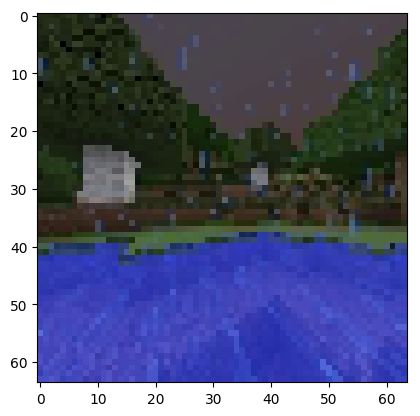

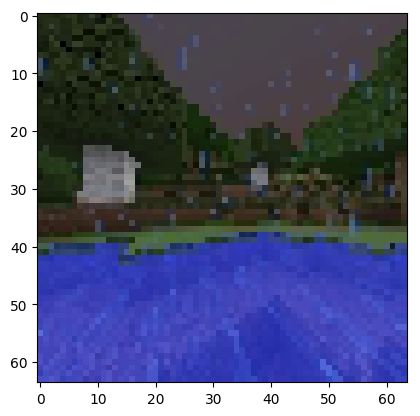

In [7]:
from IPython import display
mp4_path = os.path.join(sample_dir, "recording.mp4")

cap = cv2.VideoCapture(mp4_path)

count = 0
while(cap.isOpened()):
    try:
        ret, frame = cap.read()
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        plt.imshow(frame)
        display.clear_output(wait=True)
        display.display(plt.gcf())

    except KeyboardInterrupt:
        cap.release()
    count+=1
    if count > 50:
        break

## Concat all npz files

In [32]:
npz_path_list = glob.glob(os.path.join(DATASET_DIR, TASK_NAME)+"/*/*.npz")

df_list = []
for npz_path in npz_path_list:
    npz = np.load(npz_path)
    df_list.append(pd.DataFrame.from_dict({item: npz[item] for item in npz.files}, orient='index').T)

df_all = pd.concat(df_list)
print(df_all)

## Show all values range

In [77]:
for name in df_all.columns.values:
    if not name == "action$camera":
        unique_values = df_all[name].unique()
        ind = np.where(unique_values==None, False, True)
        if np.all(ind):
            unique_values = sorted(unique_values)
        print("{}: unique values: {}".format(name, unique_values))

reward: unique values: [0.0 1.0 2.0 4.0 8.0 16.0 32.0 64.0 128.0 256.0 1024.0 None]
observation$inventory$coal: unique values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 48, 49, 53, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 86, 88, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 104, 105, 109, 110, 114, 115, 116, 118, 119, 120, 121, 122, 123, 124, 131, 132, 133, 137, 138, 139, 140, 141]
observation$inventory$cobblestone: unique values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 

False
True
